In [1]:
import findspark
findspark.init()

In [3]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.functions import to_timestamp,col,lit

In [4]:
sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/27 19:11:39 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/03/27 19:11:41 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/03/27 19:11:41 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.
22/03/27 19:11:41 WARN Utils: Service 'SparkUI' could not bind on port 4042. Attempting port 4043.
22/03/27 19:11:41 WARN Utils: Service 'SparkUI' could not bind on port 4043. Attempting port 4044.
22/03/27 19:11:41 WARN Utils: Service 'SparkUI' could not bind on port 4044. Attempting port 4045.
22/03/27 19:11:41 WARN Utils: Service 'SparkUI' could not bind on port 4045. Attempting port 4046.


In [5]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [6]:
spark

In [8]:
df = spark.read.csv('../data/reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') < lit('2018-11-12'))
df.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

BUILT-IN FUNCTIONS

In [9]:
from pyspark.sql import functions

In [10]:
print(dir(functions))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

In [12]:
help(functions.substring)

Help on function substring in module pyspark.sql.functions:

substring(str, pos, len)
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [15]:
# display the Primary Type column in lower and upper case and the first 4 characters of the column
df.select(
            functions.lower(col('Primary Type')),
            functions.upper(col('Primary Type')),
            functions.substring(col('Primary Type'),1,4)
        ).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|            battery|            BATTERY|                         BATT|
|              theft|              THEFT|                         THEF|
|              theft|              THEFT|                         THEF|
|          narcotics|          NARCOTICS|                         NARC|
|            assault|            ASSAULT|                         ASSA|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



In [16]:
# show the oldest and most recent date
df.select(
            functions.min(col('Date')),
            functions.max(col('Date'))
        ).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 23:50:00|
+-------------------+-------------------+



In [17]:
# what is 3 days earlier than the oldest date and 3 days later than the most recent date
df.select(
            functions.date_sub(functions.min(col('Date')),3),
            functions.date_sub(functions.max(col('Date')),3)
        ).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_sub(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-08|
+----------------------+----------------------+



WORKING WITH DATES

In [18]:
from pyspark.sql.functions import to_date, to_timestamp, lit

In [20]:
dfdate = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
dfdate.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [21]:
dfdate.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



25/Dec/2019 13:30:00

12/25/2019 01:30:00 PM

WORKING WITH JOINS

In [22]:
df.show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     00

In [23]:
# download police station data
df2 = spark.read.csv('../data/Police_Stations.csv',header=True)
df2.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset

In [24]:
df.cache()
df.count()

22/03/27 19:50:06 WARN MemoryStore: Not enough space to cache rdd_70_4 in memory! (computed 26.0 MiB so far)
22/03/27 19:50:06 WARN BlockManager: Persisting block rdd_70_4 to disk instead.
22/03/27 19:50:16 WARN MemoryStore: Not enough space to cache rdd_70_6 in memory! (computed 26.1 MiB so far)
22/03/27 19:50:16 WARN BlockManager: Persisting block rdd_70_6 to disk instead.
22/03/27 19:50:17 WARN MemoryStore: Not enough space to cache rdd_70_5 in memory! (computed 26.2 MiB so far)
22/03/27 19:50:17 WARN BlockManager: Persisting block rdd_70_5 to disk instead.
22/03/27 19:50:57 WARN MemoryStore: Not enough space to cache rdd_70_7 in memory! (computed 50.6 MiB so far)
22/03/27 19:50:57 WARN BlockManager: Persisting block rdd_70_7 to disk instead.
22/03/27 19:51:37 WARN MemoryStore: Not enough space to cache rdd_70_4 in memory! (computed 50.6 MiB so far)
22/03/27 19:51:48 WARN MemoryStore: Not enough space to cache rdd_70_5 in memory! (computed 26.2 MiB so far)
22/03/27 19:51:56 WARN Mem

6755834

In [25]:
df2.select(col('DISTRICT')).distinct().show(20)

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
+------------+
only showing top 20 rows



In [26]:
df.select(col('District')).distinct().show(20)

22/03/27 19:54:16 WARN MemoryStore: Not enough space to cache rdd_70_4 in memory! (computed 26.0 MiB so far)
22/03/27 19:54:16 WARN MemoryStore: Not enough space to cache rdd_70_5 in memory! (computed 26.2 MiB so far)
22/03/27 19:54:16 WARN MemoryStore: Not enough space to cache rdd_70_6 in memory! (computed 26.1 MiB so far)
22/03/27 19:54:17 WARN MemoryStore: Not enough space to cache rdd_70_7 in memory! (computed 26.1 MiB so far)
22/03/27 19:54:19 WARN MemoryStore: Not enough space to cache rdd_70_11 in memory! (computed 25.6 MiB so far)
22/03/27 19:54:20 WARN MemoryStore: Not enough space to cache rdd_70_8 in memory! (computed 26.0 MiB so far)
22/03/27 19:54:21 WARN MemoryStore: Not enough space to cache rdd_70_9 in memory! (computed 25.7 MiB so far)
22/03/27 19:54:21 WARN MemoryStore: Not enough space to cache rdd_70_10 in memory! (computed 25.8 MiB so far)
22/03/27 19:54:23 WARN MemoryStore: Not enough space to cache rdd_70_12 in memory! (computed 24.8 MiB so far)


+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
+--------+
only showing top 20 rows



In [27]:
from pyspark.sql.functions import lpad

In [28]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col, len, pad)
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [29]:
df2.select(lpad(col('DISTRICT'),3,'0')).show(20)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [32]:
# create a new column called 'District' with the padded district number
df2 = df2.withColumn('FormatDistrict',lpad(col('DISTRICT'),3,'0'))

In [33]:
df.join(df2, df.District == df2.FormatDistrict, 'left_outer').show()

22/03/27 19:54:56 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|DISTRICT| DISTRICT NAME|             ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|FormatDistrict

In [34]:
# drop some columns
df2.columns

['DISTRICT',
 'DISTRICT NAME',
 'ADDRESS',
 'CITY',
 'STATE',
 'ZIP',
 'WEBSITE',
 'PHONE',
 'FAX',
 'TTY',
 'X COORDINATE',
 'Y COORDINATE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'FormatDistrict']

In [35]:
df.join(df2, df.District == df2.FormatDistrict, 'left_outer').drop(
    'ADDRESS',
    'CITY',
    'STATE',
    'ZIP',
    'WEBSITE',
    'PHONE',
    'FAX',
    'TTY',
    'X COORDINATE',
    'Y COORDINATE',
    'LATITUDE',
    'LONGITUDE',
    'LOCATION'
    ).show(5)

+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+--------------+
|      ID|Case Number|               Date|               Block|IUCR|Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|FormatDistrict|
+--------+-----------+-------------------+--------------------+----+------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+--------------+
|10224738|   HY411648|2015-09-05 13:30:00|     043XX S WOOD ST|0486|     BATTERY|DOMESTIC BATTERY ...|           RESIDENCE| false|    true|0924|     009|  12|            61|     08B|2015|02/10/2018 03:50:...|       9|      Deering|           009|
|10224739|  

questions

In [37]:
df.createOrReplaceTempView('crimes')

In [46]:
# what is the most frequently reported non-criminal activity?
df.filter((col('PrimaryType') == 'NON - CRIMINAL') | (col('PrimaryType') == 'NON-CRIMINAL') | (col('PrimaryType') == 'NON-CRIMINAL (SUBJECT SPECIFIED)')).groupBy(col('Description')).count().orderBy(col('count').desc()).show(5)

+--------------------+-----+
|         Description|count|
+--------------------+-----+
|       LOST PASSPORT|  107|
|   FOID - REVOCATION|   75|
|NOTIFICATION OF C...|    9|
|NOTIFICATION OF S...|    8|
|CONCEALED CARRY L...|    4|
+--------------------+-----+
only showing top 5 rows



In [39]:
df = df.withColumnRenamed('Primary Type', 'PrimaryType')

In [41]:
df.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'PrimaryType',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [42]:
df.createOrReplaceTempView('crimes')

In [43]:
spark.sql('select PrimaryType, count(*) as count from crimes group by PrimaryType order by count desc limit 5').show()

+---------------+-------+
|    PrimaryType|  count|
+---------------+-------+
|          THEFT|1418618|
|        BATTERY|1232397|
|CRIMINAL DAMAGE| 771578|
|      NARCOTICS| 711781|
|  OTHER OFFENSE| 418930|
+---------------+-------+



In [51]:
from pyspark.sql.functions import dayofweek, date_format

In [50]:
# which day of the week has the most reported crimes?
df.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2015-09-05 13:30:00|              7|
|2015-09-04 11:30:00|              6|
|2018-09-01 00:01:00|              7|
|2015-09-05 12:45:00|              7|
|2015-09-05 13:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [52]:
df.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2015-09-05 13:30:00|              7|                 Sat|
|2015-09-04 11:30:00|              6|                 Fri|
|2018-09-01 00:01:00|              7|                 Sat|
|2015-09-05 12:45:00|              7|                 Sat|
|2015-09-05 13:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [53]:
df.groupBy(date_format(col('Date'), 'E')).count().orderBy(col('count').desc()).show(5)

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017254|
|                 Wed| 974147|
|                 Tue| 968295|
|                 Sat| 965409|
|                 Thu| 964867|
+--------------------+-------+
only showing top 5 rows



Using a bar chart, plot which day of the week has the most number of reported crime.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
df.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912852),
 Row(date_format(Date, E)='Mon', count=953010),
 Row(date_format(Date, E)='Thu', count=964867),
 Row(date_format(Date, E)='Sat', count=965409),
 Row(date_format(Date, E)='Wed', count=974147),
 Row(date_format(Date, E)='Fri', count=1017254),
 Row(date_format(Date, E)='Tue', count=968295)]

In [56]:
day_of_week = [x[0] for x in df.groupBy(date_format(col('Date'), 'E')).count().collect()]
day_of_week

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Fri', 'Tue']

In [57]:
cnt = [x[1] for x in df.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[912852, 953010, 964867, 965409, 974147, 1017254, 968295]

In [58]:
cp = pd.DataFrame({'day_of_week': day_of_week, 'count': cnt})
cp.head(7)

,day_of_week,count
0,Sun,912852
1,Mon,953010
2,Thu,964867
3,Sat,965409
4,Wed,974147
5,Fri,1017254
6,Tue,968295


<Figure size 720x432 with 0 Axes>

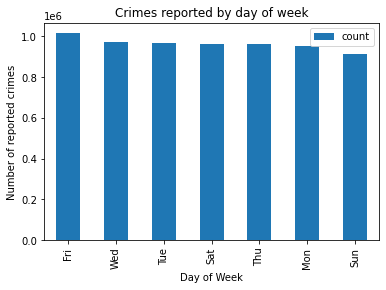

22/03/27 23:49:53 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 7198555 ms exceeds timeout 120000 ms
22/03/27 23:49:53 WARN SparkContext: Killing executors is not supported by current scheduler.


In [61]:
plt.figure(figsize=(10,6))
cp.sort_values('count', ascending=False).plot(kind='bar', x='day_of_week', y='count')
plt.xlabel('Day of Week')
plt.ylabel('Number of reported crimes')
plt.title('Crimes reported by day of week')
plt.show()